## Impact of political constraints on central bank's reaction function?
**Author: Suraj Kumar** *(Along with Dr. Mitra, and Prof. Chatterjee)*

*Centre for Advanced Financial Research and Learning, Reserve Bank of India, Mumbai*

**Abstract**
* In this notebook, I analyze the pass-through of shocks in inflation, IP and REER on the policy rate under high and low political constraints' environment for 15 emerging-market countries. 

**Data**
* Macro-data: policy rate, inflation, IP and REER for Brazil, Chile, Colombia, Indonesia, South Korea, Mexico, Malaysia, Peru, Philippines, Russia, Thailand, Turkey, Taiwan, South Africa and India. 
* Political constraints'data : [Upenn's POLCON dataset](https://mgmt.wharton.upenn.edu/faculty/heniszpolcon/polcondataset/)
Specifically, I use "polconv" as a measure for political constraints from there 2017 data release.


**High/Low POLCON Regime**

In the following set of codes, I estimate IRF of interest rates to inflation shocks for two different POLCON regimes. I define

* High Polcon regime (H2): $pconv_{c,t} > Median(pconv_{c,t})$ for country $i$
* Low Polcon regime (L2): $pconv_{c,t} \leq  Median(pconv_{c,t})$ for country $i$

Here the $Median$ is calculated differently for each country, note we already have this information in data segregated by $dumL2, dumH2$.


**Findings**

Please note these results are based on simple panel local projections which may suffer from endogeneity between independent and dependent variables. However, as first-cut results, they are useful to look at. 

1. Initially, the countries in low-political constrained environment react more to inflation shocks, however after some lag (8 to 9 months) countries in high-political constrained react more to inflation shocks. 
2. Response of policy rate to IP shocks in nor significant and neither statistically different from one another. 
3. Initially, countries in low-political constrained environment react much more by lowering policy rate than countries in high-political constrained environment to positive REER shocks. However, after sometime (12 months), high-political constrained countries catch up, so the response of monetary policy to REER shocks is very similar in the two regimes



**Code Credits**

[Oscar Jorda STATA Code](https://sites.google.com/site/oscarjorda/home/local-projections)

In [1]:
** Preliminary settings

// Set more
set more off

* * * * * * * Navigating to the folder
global folder "/Users/suraj/Dropbox/Chatterjee_Mitra_Fiscal_Dominance/Empirics"
cd "$folder"




/Users/suraj/Library/CloudStorage/Dropbox/Chatterjee_Mitra_Fiscal_Dominance/Empi
> rics


In [2]:
// Loading the data
clear
use "$folder/data/panel_df_tr2.dta", replace

In [3]:
* Choose impulse reponse horizon variable for policy rates
local hmax = 24
foreach x in srr {
    forvalue h = 0/`hmax'{
        qui gen `x'_`h' = f`h'.`x'
    }
}

// Please note cpi, ip, usdex, reer, neer are already in log terms, so we can just take a simple difference
foreach x in cpi reer neer ip {
    qui gen `x'_yoy = `x'-l12.`x'
}

In [4]:
// Specifying options for local projection regression 
local ar = 12
local ma = 12

#### 1.  Estimating local projections for two POLCON regimes (H2/L2)

#### 1.1 Regression 1 - Short-run interest rate on inflation only

In [5]:
* Running srr on lags of cpi and its own lags for low POLCON environment
eststo clear
qui cap drop b_srr_inf_R1_L2 u_srr_inf_R1_L2 d_srr_inf_R1_L2 

* Initializing variables to store the regression output
// qui gen horizons = _n-1 if _n <= `hmax'
// qui gen Zero = 0 if _n <= `hmax'
qui gen b_srr_inf_R1_L2 = .
qui gen u_srr_inf_R1_L2 = .
qui gen d_srr_inf_R1_L2 = .


forv h = 0/`hmax'{
    
    ** Regression 1
    * on inflation
    qui reghdfe srr_`h' l(0/`ma').cpi_yoy l(1/`ar').srr  if dumL2 == 1, absorb(country_code2 mdate) cluster(country_code2)
    
    // Saving the Food Coefficient results
    qui replace b_srr_inf_R1_L2 = _b[cpi_yoy]  if _n == `h'+1
    qui replace u_srr_inf_R1_L2 = _b[cpi_yoy] + 1.96*_se[cpi_yoy] if _n == `h'+1
    qui replace d_srr_inf_R1_L2 = _b[cpi_yoy] - 1.96*_se[cpi_yoy] if _n == `h'+1
    
    qui eststo
}

// // Saving the regression output
// qui esttab using "$folder/regression/lp_srr_on_cpi_R1_L2.html", html replace

In [6]:
* Running srr on lags of cpi and its own lags for high POLCON environment
eststo clear
qui cap drop b_srr_inf_R1_H2 u_srr_inf_R1_H2 d_srr_inf_R1_H2 

* Initializing variables to store the regression output
qui gen horizons = _n-1 if _n <= `hmax'
qui gen Zero = 0 if _n <= `hmax'
qui gen b_srr_inf_R1_H2 = .
qui gen u_srr_inf_R1_H2 = .
qui gen d_srr_inf_R1_H2 = .


forv h = 0/`hmax'{
    
    ** Regression 1
    * on inflation
    qui reghdfe srr_`h' l(0/`ma').cpi_yoy l(1/`ar').srr  if dumH2 == 1, absorb(country_code2 mdate) cluster(country_code2)
    
    // Saving the Food Coefficient results
    qui replace b_srr_inf_R1_H2 = _b[cpi_yoy]  if _n == `h'+1
    qui replace u_srr_inf_R1_H2 = _b[cpi_yoy] + 1.96*_se[cpi_yoy] if _n == `h'+1
    qui replace d_srr_inf_R1_H2 = _b[cpi_yoy] - 1.96*_se[cpi_yoy] if _n == `h'+1
    
    qui eststo
}

// // Saving the regression output
// qui esttab using "$folder/regression/lp_srr_on_cpi_R1_H2.html", html replace


#### 1.2 Regression 2 - Short-run interest rate on inflation and IP only

In [7]:
* Running srr on lags of cpi, ip and its own lags for low POLCON environment
eststo clear
qui cap drop b_srr_inf_R2_L2 u_srr_inf_R2_L2 d_srr_inf_R2_L2 b_srr_ip_R2_L2 u_srr_ip_R2_L2 d_srr_ip_R2_L2

* Initializing variables to store the regression output
// qui gen horizons = _n-1 if _n <= `hmax'
// qui gen Zero = 0 if _n <= `hmax'
qui gen b_srr_inf_R2_L2 = .
qui gen u_srr_inf_R2_L2 = .
qui gen d_srr_inf_R2_L2 = .

qui gen b_srr_ip_R2_L2 = .
qui gen u_srr_ip_R2_L2 = .
qui gen d_srr_ip_R2_L2 = .


forv h = 0/`hmax'{
    
    ** Regression 1
    * on inflation
    qui reghdfe srr_`h' l(0/`ma').cpi_yoy l(0/`ma').ip_yoy l(1/`ar').srr  if dumL2 == 1, absorb(country_code2 mdate) cluster(country_code2)
    
    // Saving the Food Coefficient results
    qui replace b_srr_inf_R2_L2 = _b[cpi_yoy]  if _n == `h'+1
    qui replace u_srr_inf_R2_L2 = _b[cpi_yoy] + 1.96*_se[cpi_yoy] if _n == `h'+1
    qui replace d_srr_inf_R2_L2 = _b[cpi_yoy] - 1.96*_se[cpi_yoy] if _n == `h'+1

    // Saving the ip Coefficient Reults
    qui replace b_srr_ip_R2_L2 = _b[ip_yoy]  if _n == `h'+1
    qui replace u_srr_ip_R2_L2 = _b[ip_yoy] + 1.96*_se[ip_yoy] if _n == `h'+1
    qui replace d_srr_ip_R2_L2 = _b[ip_yoy] - 1.96*_se[ip_yoy] if _n == `h'+1
    
    qui eststo
}

// // Saving the regression output
// qui esttab using "$folder/regression/lp_srr_on_cpi_ip_R2_L2.html", html replace

In [8]:
* Running srr on lags of cpi, ip and its own lags for high POLCON environment
eststo clear
qui cap drop b_srr_inf_R2_H2 u_srr_inf_R2_H2 d_srr_inf_R2_H2 b_srr_ip_R2_H2 u_srr_ip_R2_H2 d_srr_ip_R2_H2

* Initializing variables to store the regression output
// qui gen horizons = _n-1 if _n <= `hmax'
// qui gen Zero = 0 if _n <= `hmax'
qui gen b_srr_inf_R2_H2 = .
qui gen u_srr_inf_R2_H2 = .
qui gen d_srr_inf_R2_H2 = .

qui gen b_srr_ip_R2_H2 = .
qui gen u_srr_ip_R2_H2 = .
qui gen d_srr_ip_R2_H2 = .


forv h = 0/`hmax'{
    
    ** Regression 1
    * on inflation
    qui reghdfe srr_`h' l(0/`ma').cpi_yoy l(0/`ma').ip_yoy l(1/`ar').srr  if dumH2 == 1, absorb(country_code2 mdate) cluster(country_code2)
    
    // Saving the Food Coefficient results
    qui replace b_srr_inf_R2_H2 = _b[cpi_yoy]  if _n == `h'+1
    qui replace u_srr_inf_R2_H2 = _b[cpi_yoy] + 1.96*_se[cpi_yoy] if _n == `h'+1
    qui replace d_srr_inf_R2_H2 = _b[cpi_yoy] - 1.96*_se[cpi_yoy] if _n == `h'+1

    // Saving the ip Coefficient Reults
    qui replace b_srr_ip_R2_H2 = _b[ip_yoy]  if _n == `h'+1
    qui replace u_srr_ip_R2_H2 = _b[ip_yoy] + 1.96*_se[ip_yoy] if _n == `h'+1
    qui replace d_srr_ip_R2_H2 = _b[ip_yoy] - 1.96*_se[ip_yoy] if _n == `h'+1
    
    qui eststo
}

// // Saving the regression output
// qui esttab using "$folder/regression/lp_srr_on_cpi_ip_R2_H2.html", html replace

#### 1.3 Regression 3 - Short-run interest rate on inflation, IP and REER 


In [9]:
* Running srr on lags of cpi, ip, reer and its own lags for low POLCON environment
eststo clear
qui cap drop b_srr_inf_R3_L2 u_srr_inf_R3_L2 d_srr_inf_R3_L2 b_srr_ip_R3_L2 u_srr_ip_R3_L2 d_srr_ip_R3_L2 b_srr_reer_R3_L2 u_srr_reer_R3_L2 d_srr_reer_R3_L2

* Initializing variables to store the regression output
// qui gen horizons = _n-1 if _n <= `hmax'
// qui gen Zero = 0 if _n <= `hmax'
qui gen b_srr_inf_R3_L2 = .
qui gen u_srr_inf_R3_L2 = .
qui gen d_srr_inf_R3_L2 = .
qui gen b_srr_ip_R3_L2 = .
qui gen u_srr_ip_R3_L2 = .
qui gen d_srr_ip_R3_L2 = .
qui gen b_srr_reer_R3_L2 = .
qui gen u_srr_reer_R3_L2 = .
qui gen d_srr_reer_R3_L2 = .

forv h = 0/`hmax'{
    
    ** Regression 1
    * on inflation
    qui reghdfe srr_`h' l(0/`ma').cpi_yoy l(0/`ma').ip_yoy l(0/`ma').reer_yoy l(1/`ar').srr  if dumL2 == 1, absorb(country_code2 mdate) cluster(country_code2)
    
    // Saving the Food Coefficient results
    qui replace b_srr_inf_R3_L2 = _b[cpi_yoy]  if _n == `h'+1
    qui replace u_srr_inf_R3_L2 = _b[cpi_yoy] + 1.96*_se[cpi_yoy] if _n == `h'+1
    qui replace d_srr_inf_R3_L2 = _b[cpi_yoy] - 1.96*_se[cpi_yoy] if _n == `h'+1
    
    // Saving the ip Coefficient Reults
    qui replace b_srr_ip_R3_L2 = _b[ip_yoy]  if _n == `h'+1
    qui replace u_srr_ip_R3_L2 = _b[ip_yoy] + 1.96*_se[ip_yoy] if _n == `h'+1
    qui replace d_srr_ip_R3_L2 = _b[ip_yoy] - 1.96*_se[ip_yoy] if _n == `h'+1

     // Saving the reer Coefficient Reults
    qui replace b_srr_reer_R3_L2 = _b[reer_yoy]  if _n == `h'+1
    qui replace u_srr_reer_R3_L2 = _b[reer_yoy] + 1.96*_se[reer_yoy] if _n == `h'+1
    qui replace d_srr_reer_R3_L2 = _b[reer_yoy] - 1.96*_se[reer_yoy] if _n == `h'+1
    qui eststo
}

// // Saving the regression output
// qui esttab using "$folder/regression/lp_srr_on_cpi_ip_reer_R3_L2.html", html replace

In [10]:
* Running srr on lags of cpi, ip, reer and its own lags for high POLCON environment
eststo clear
qui cap drop b_srr_inf_R3_H2 u_srr_inf_R3_H2 d_srr_inf_R3_H2 b_srr_ip_R3_H2 u_srr_ip_R3_H2 d_srr_ip_R3_H2 b_srr_reer_R3_H2 u_srr_reer_R3_H2 d_srr_reer_R3_H2

* Initializing variables to store the regression output
// qui gen horizons = _n-1 if _n <= `hmax'
// qui gen Zero = 0 if _n <= `hmax'
qui gen b_srr_inf_R3_H2 = .
qui gen u_srr_inf_R3_H2 = .
qui gen d_srr_inf_R3_H2 = .
qui gen b_srr_ip_R3_H2 = .
qui gen u_srr_ip_R3_H2 = .
qui gen d_srr_ip_R3_H2 = .
qui gen b_srr_reer_R3_H2 = .
qui gen u_srr_reer_R3_H2 = .
qui gen d_srr_reer_R3_H2 = .

forv h = 0/`hmax'{
    
    ** Regression 1
    * on inflation
    qui reghdfe srr_`h' l(0/`ma').cpi_yoy l(0/`ma').ip_yoy l(0/`ma').reer_yoy l(1/`ar').srr  if dumH2 == 1, absorb(country_code2 mdate) cluster(country_code2)
    
    // Saving the Food Coefficient results
    qui replace b_srr_inf_R3_H2 = _b[cpi_yoy]  if _n == `h'+1
    qui replace u_srr_inf_R3_H2 = _b[cpi_yoy] + 1.96*_se[cpi_yoy] if _n == `h'+1
    qui replace d_srr_inf_R3_H2 = _b[cpi_yoy] - 1.96*_se[cpi_yoy] if _n == `h'+1
    
    // Saving the ip Coefficient Reults
    qui replace b_srr_ip_R3_H2 = _b[ip_yoy]  if _n == `h'+1
    qui replace u_srr_ip_R3_H2 = _b[ip_yoy] + 1.96*_se[ip_yoy] if _n == `h'+1
    qui replace d_srr_ip_R3_H2 = _b[ip_yoy] - 1.96*_se[ip_yoy] if _n == `h'+1

     // Saving the reer Coefficient Reults
    qui replace b_srr_reer_R3_H2 = _b[reer_yoy]  if _n == `h'+1
    qui replace u_srr_reer_R3_H2 = _b[reer_yoy] + 1.96*_se[reer_yoy] if _n == `h'+1
    qui replace d_srr_reer_R3_H2 = _b[reer_yoy] - 1.96*_se[reer_yoy] if _n == `h'+1
    qui eststo
}

// // Saving the regression output
// qui esttab using "$folder/regression/lp_srr_on_cpi_ip_reer_R3_H2.html", html replace

#### 2. Plotting the results


(note:  named style med not found in class gsize, default attributes used)


(note:  named style med not found in class gsize, default attributes used)


(note:  named style med not found in class gsize, default attributes used)


(note:  named style med not found in class gsize, default attributes used)


(note:  named style med not found in class gsize, default attributes used)


(note:  named style med not found in class gsize, default attributes used)


(note:  named style med not found in class gsize, default attributes used)
(note:  named style med not found in class gsize, default attributes used)
(note:  named style med not found in class gsize, default attributes used)
(note:  named style med not found in class gsize, default attributes used)
(note:  named style med not found in class gsize, default attributes used)
(note:  named style med not found in class gsize, default attributes used)


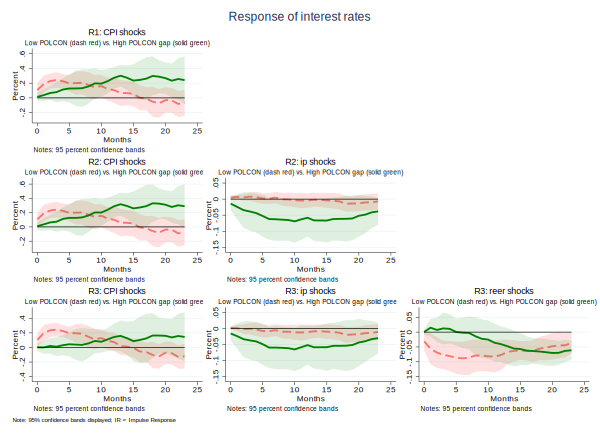



(file /Users/suraj/Dropbox/Chatterjee_Mitra_Fiscal_Dominance/Empirics/Plots/LP_T
> R_H2_L2_regime_R1_R2_R3.png written in PNG format)


In [11]:
// Regression 1 Results

// Plotting for response interest rates to inflation shocks
qui twoway ///
(rarea u_srr_inf_R1_L2 d_srr_inf_R1_L2  horizons,  ///
fcolor(red%15) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_srr_inf_R1_L2 horizons, lcolor(red%50) lpattern(dash) lwidth(thick)) ///
(rarea u_srr_inf_R1_H2 d_srr_inf_R1_H2  horizons,  ///
fcolor(green%15) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_srr_inf_R1_H2 horizons, lcolor(green) lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("R1: CPI shocks", color(black) size(med)) ///
subtitle("Low POLCON (dash red) vs. High POLCON gap (solid green)", color(black) size(small)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
note("Notes: 95 percent confidence bands") ///
graphregion(color(white)) plotregion(color(white))
qui gr rename fig_srr_inf_L2_vs_H2_R1, replace


// Regression 2 Results

// Plotting for response interest rates to inflation shocks
qui twoway ///
(rarea u_srr_inf_R2_L2 d_srr_inf_R2_L2  horizons,  ///
fcolor(red%15) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_srr_inf_R2_L2 horizons, lcolor(red%50) lpattern(dash) lwidth(thick)) ///
(rarea u_srr_inf_R2_H2 d_srr_inf_R2_H2  horizons,  ///
fcolor(green%15) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_srr_inf_R2_H2 horizons, lcolor(green) lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("R2: CPI shocks", color(black) size(med)) ///
subtitle("Low POLCON (dash red) vs. High POLCON gap (solid green)", color(black) size(small)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
note("Notes: 95 percent confidence bands") ///
graphregion(color(white)) plotregion(color(white))
qui gr rename fig_srr_inf_L2_vs_H2_R2, replace

// Plotting for response interest rates to ip shocks
qui twoway ///
(rarea u_srr_ip_R2_L2 d_srr_ip_R2_L2  horizons,  ///
fcolor(red%15) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_srr_ip_R2_L2 horizons, lcolor(red%50) lpattern(dash) lwidth(thick)) ///
(rarea u_srr_ip_R2_H2 d_srr_ip_R2_H2  horizons,  ///
fcolor(green%15) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_srr_ip_R2_H2 horizons, lcolor(green) lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("R2: ip shocks", color(black) size(med)) ///
subtitle("Low POLCON (dash red) vs. High POLCON gap (solid green)", color(black) size(small)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
note("Notes: 95 percent confidence bands") ///
graphregion(color(white)) plotregion(color(white))
qui gr rename fig_srr_ip_L2_vs_H2_R2, replace

// Regression 3 Results

// Plotting for response interest rates to inflation shocks
qui twoway ///
(rarea u_srr_inf_R3_L2 d_srr_inf_R3_L2  horizons,  ///
fcolor(red%15) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_srr_inf_R3_L2 horizons, lcolor(red%50) lpattern(dash) lwidth(thick)) ///
(rarea u_srr_inf_R3_H2 d_srr_inf_R3_H2  horizons,  ///
fcolor(green%15) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_srr_inf_R3_H2 horizons, lcolor(green) lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("R3: CPI shocks", color(black) size(med)) ///
subtitle("Low POLCON (dash red) vs. High POLCON gap (solid green)", color(black) size(small)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
note("Notes: 95 percent confidence bands") ///
graphregion(color(white)) plotregion(color(white))
qui gr rename fig_srr_inf_L2_vs_H2_R3, replace

// Plotting for response interest rates to ip shocks
qui twoway ///
(rarea u_srr_ip_R3_L2 d_srr_ip_R3_L2  horizons,  ///
fcolor(red%15) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_srr_ip_R3_L2 horizons, lcolor(red%50) lpattern(dash) lwidth(thick)) ///
(rarea u_srr_ip_R3_H2 d_srr_ip_R3_H2  horizons,  ///
fcolor(green%15) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_srr_ip_R3_H2 horizons, lcolor(green) lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("R3: ip shocks", color(black) size(med)) ///
subtitle("Low POLCON (dash red) vs. High POLCON gap (solid green)", color(black) size(small)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
note("Notes: 95 percent confidence bands") ///
graphregion(color(white)) plotregion(color(white))
qui gr rename fig_srr_ip_L2_vs_H2_R3, replace

// Plotting for response interest rates to REER shocks
qui twoway ///
(rarea u_srr_reer_R3_L2 d_srr_reer_R3_L2  horizons,  ///
fcolor(red%15) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_srr_reer_R3_L2 horizons, lcolor(red%50) lpattern(dash) lwidth(thick)) ///
(rarea u_srr_reer_R3_H2 d_srr_reer_R3_H2  horizons,  ///
fcolor(green%15) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_srr_reer_R3_H2 horizons, lcolor(green) lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("R3: reer shocks", color(black) size(med)) ///
subtitle("Low POLCON (dash red) vs. High POLCON gap (solid green)", color(black) size(small)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
note("Notes: 95 percent confidence bands") ///
graphregion(color(white)) plotregion(color(white))
qui gr rename fig_srr_reer_L2_vs_H2_R3, replace



// Combining all three regression results together
gr combine fig_srr_inf_L2_vs_H2_R1 ///
fig_srr_inf_L2_vs_H2_R2 fig_srr_ip_L2_vs_H2_R2 ///
fig_srr_inf_L2_vs_H2_R3 fig_srr_ip_L2_vs_H2_R3 fig_srr_reer_L2_vs_H2_R3   , ///
hole(2 3 6) ///
col(3) /// ycommon ///
imargin(tiny) ///
graphregion(color(white)) plotregion(color(white)) ///
iscale(*0.8) ///
title("Response of interest rates", size(small)) ///
note("Note: 95% confidence bands displayed; IR = Impulse Response" ,size(tiny))

/* Save the combined graph to a file */
graph export "$folder/Plots/LP_TR_H2_L2_regime_R1_R2_R3.png", width(3600) height(3600)  replace 

#### Result

![](LP_TR_H2_L2_regime_R1_R2_R3.png)
